<a href="https://colab.research.google.com/github/rsurapol/Python-for-Numerical-Methods-for-Engineer/blob/master/Code_for_Numerical_Chpter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# โปรแกรมแบบง่าย ด้วยการแทรก function ไว้ด้านบน

## ตอนที่ 18 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีกำจัดแบบเกาส์

---



In [ ]:
"""
ตอนที่ 18 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีกำจัดแบบเกาส์
https://trinket.io/python/e8f8c709a3

"""
def column(m, c):
  return [m[i][c] for i in range(len(m))]

def height(m):
  return len(m)

def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])

def row(m, r):
  return m[r][:]

def gaussian_elimination(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  for i in range(n):
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]
      print_matrix(m)
      print("---------------------------------------")
  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):  # for i in reversed(range(n)):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

if __name__ == '__main__':
  m = [[1, 2, 3, 7], [2, -1, -1, 1], [3, -1, -2, 4]]
  #print_matrix(m)
  #print(height(m))
  #print(width(m))
  #print(column(m,1))
  #print(row(m,2))
  #print("\n")
  print(gaussian_elimination(m))   # [2.0, 4.0, -1.0]

[1, 2, 3, 7]
[0.0, -5.0, -7.0, -13.0]
[3, -1, -2, 4]
---------------------------------------
[1, 2, 3, 7]
[0.0, -5.0, -7.0, -13.0]
[0.0, -7.0, -11.0, -17.0]
---------------------------------------
[1, 2, 3, 7]
[0.0, -5.0, -7.0, -13.0]
[0.0, 0.0, -1.1999999999999993, 1.1999999999999993]
---------------------------------------
[2.0, 4.0, -1.0]


## ตอนที่ 20 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีการหาตัวหลักบางส่วน

In [ ]:
"""
ตอนที่ 20 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีการหาตัวหลักบางส่วน

https://trinket.io/python/d54bc90d4e

"""

def column(m, c):
  return [m[i][c] for i in range(len(m))]

def height(m):
  return len(m)

def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])

def row(m, r):
  return m[r][:]


# shorter way to pivot but cannot run in trinket
def pivot(m, n, i):
  max_row = max(range(i, n), key=lambda r: abs(m[r][i]))
  m[i], m[max_row] = m[max_row], m[i]

"""
def pivot(m, n, i):
  max = 1e-100
  for r in range(i, n):
    if max < abs(m[r][i]):
      max_row = r
      max = abs(m[r][i])
  m[i], m[max_row] = m[max_row], m[i]
"""

def gaussian_elimination_with_pivot(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  for i in range(n):
    pivot(m, n, i)
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]

    print_matrix(m)
    print("----------------------")
  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

if __name__ == '__main__':
  m = [[0,-2,6,-10], [-1,3,-6,5], [4,-12,8,12]]

  print("\n\n")
  print_matrix(m)

  print("\n\n")
  print(gaussian_elimination_with_pivot(m))
  #Exact Values [4, -1, -2]




[0, -2, 6, -10]
[-1, 3, -6, 5]
[4, -12, 8, 12]



[4, -12, 8, 12]
[0.0, 0.0, -4.0, 8.0]
[0.0, -2.0, 6.0, -10.0]
----------------------
[4, -12, 8, 12]
[0.0, -2.0, 6.0, -10.0]
[0.0, 0.0, -4.0, 8.0]
----------------------
[4, -12, 8, 12]
[0.0, -2.0, 6.0, -10.0]
[0.0, 0.0, -4.0, 8.0]
----------------------
[4.0, -1.0, -2.0]


## ตอนที่ 22 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีการจัดสเกล

In [ ]:
"""
ตอนที่ 22 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีการจัดสเกล

https://trinket.io/python/041d344e52

"""
def column(m, c):
  return [m[i][c] for i in range(len(m))]

def height(m):
  return len(m)

def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])

def row(m, r):
  return m[r][:]

# shorter version but cannot run in trinket
def pivot(m, n, i, scale):
  max_row = max(range(i, n), key=lambda r: abs(m[r][i]/scale[r]))
  scale[i], scale[max_row] = scale[max_row], scale[i]
  m[i], m[max_row] = m[max_row], m[i]

"""
def pivot(m, n, i, scale):
  max = 1e-100
  for r in range(i, n):
    if max < abs(m[r][i]/scale[r]):
      max_row = r
      max = abs(m[r][i]/scale[r])
  scale[i], scale[max_row] = scale[max_row], scale[i]
  m[i], m[max_row] = m[max_row], m[i]
"""

def gaussian_elimination_with_scaled_pivot(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  scale = [max([abs(m[i][j]) for j in range(n)]) for i in range(n)]
  for i in range(n):
    pivot(m, n, i, scale)
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]

    print_matrix(m)
    print("--------------------------------")

  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x


if __name__ == '__main__':
  m = [[0.00001, 1, 1],[1, 1, 2]]

  print("\n\n")
  print_matrix(m)

  print("\n\n")
  print(gaussian_elimination_with_scaled_pivot(m))

#Exact values [1.000010, 0.999990]




[1e-05, 1, 1]
[1, 1, 2]



[1, 1, 2]
[0.0, 0.99999, 0.99998]
--------------------------------
[1, 1, 2]
[0.0, 0.99999, 0.99998]
--------------------------------
[1.000010000100001, 0.9999899998999989]


## ตอนที่ 24 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบยาโคบี

In [ ]:
"""
ตอนที่ 24 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบยาโคบี

https://trinket.io/python/5c952ce22f

"""
def column(m, c):
  return [m[i][c] for i in range(len(m))]

def height(m):
  return len(m)

def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])

def row(m, r):
  return m[r][:]

def jacobi(m, x0=None, eps=1e-10, max_iteration=100):
  """
  Parameters
  ----------
  m  : list of list of floats : coefficient matrix
  x0 : list of floats : initial guess
  eps: float : error tolerance
  max_iteration: int

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      Solution does not converge
  """
  n  = height(m)
  x0 = [0] * n if x0 == None else x0
  x1 = [None] * n

  count=0
  for __ in range(max_iteration):
    count = count +1
    print(count)
    for i in range(n):
      s = sum(-m[i][j] * x0[j] for j in range(n) if i != j)
      x1[i] = (m[i][n] + s) / m[i][i]
    if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
      return x1
    x0, x1 = x1, x0

  raise ValueError('Solution does not converge')

if __name__ == '__main__':
  m = [[4,3.2,0.5,9.2],[2.2,3,-0.3,0.9],[-3.1,-0.2,4,7]]

  print("\n\n")
  print_matrix(m)

  print("\n\n")
  print(jacobi(m))

#Exact values [3.0, -1.5, 4.0]

## ตอนที่ 26 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบเกาส์ ไซเดล

In [ ]:
"""
ตอนที่ 26 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบเกาส์ ไซเดล

https://trinket.io/python/5b27a4cf83

"""
def column(m, c):
  return [m[i][c] for i in range(len(m))]

def height(m):
  return len(m)

def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])

def row(m, r):
  return m[r][:]

def gauss_seidel(m, x0=None, eps=1e-7, max_iteration=100):
  """
  Parameters
  ----------
  m  : list of list of floats : coefficient matrix
  x0 : list of floats : initial guess
  eps: float : error tolerance
  max_iteration: int

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      Solution does not converge
  """
  n  = height(m)
  x0 = [0] * n if x0 == None else x0
  x1 = x0[:]

  count=0
  for __ in range(max_iteration):
    count = count +1
    print(count)
    for i in range(n):
      s = sum(-m[i][j] * x1[j] for j in range(n) if i != j)
      x1[i] = (m[i][n] + s) / m[i][i]
    if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
      return x1
    x0 = x1[:]

  raise ValueError('Solution does not converge')

if __name__ == '__main__':
  m = [[4,3.2,0.5,9.2], [2.2,3,-0.3,0.9], [-3.1,-0.2,4,7]]
  print(gauss_seidel(m),2.5)

#Exact values [3.0, -1.5, 4.0]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
[3.0000000316971365, -1.5000000146069496, 4.000000023834933] 2.5


## ตอนที่ 28 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบผ่อนปรนเกินสืบเนื่อง

In [ ]:
"""
ตอนที่ 28 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบผ่อนปรนเกินสืบเนื่อง

https://trinket.io/python/aea71b62f6

"""
# successive over-relaxation

def column(m, c):
  return [m[i][c] for i in range(len(m))]

def height(m):
  return len(m)

def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])

def row(m, r):
  return m[r][:]

def sor(m, w=1.25, x0=None, eps=1e-7, max_iteration=100):
  """
  Parameters
  ----------
  m  : list of list of floats : coefficient matrix
  w  : float : weight
  x0 : list of floats : initial guess
  eps: float : error tolerance
  max_iteration: int

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      Solution does not converge
  """
  n  = height(m)
  x0 = [0] * n if x0 == None else x0
  x1 = x0[:]

  count = 0
  for __ in range(max_iteration):
    count = count + 1
    print(count)
    for i in range(n):
      s = sum(-m[i][j] * x1[j] for j in range(n) if i != j)
      x1[i] = w*(m[i][n]+s)/m[i][i] + (1-w)*x0[i]
    if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
      return x1
    x0 = x1[:]
  raise ValueError('Solution does not converge')


if __name__ == '__main__':
  m = [[4,3.2,0.5,9.2], [2.2,3,-0.3,0.9], [-3.1,-0.2,4,7]]
  print("\n\n")
  print(sor(m))

#Exact values [3.0, -1.5, 4.0]

# คำแนะนำเพิ่มเติม เพิ่มการอัพโหลดโมดูล
## ขั้นเตรียมการก่อนทำงานใน EP.18

1.   ต้องสร้างไฟล์ matrix.py ในโปรแกรม notepad หรือ ms word ก็ได้ครับ ให้ บันทึกเป็น ไฟล์ นามสกุล .py

2.   เปิด google colab สร้างไฟล์ EP18.ipynb สร้างโปรแกรมตามนี้ครับ


```
# มีการจัดรูปแบบเป็นโค้ด
from google.colab import files
files.upload()
```



เมื่อสร้างเสร็จให้ กดปุ่ม รันโปรแกรม
เพื่อใช้ในการ upload file calculator.py และ my_module.py ครับ

3. ในบรรทัดถัดมาให้สร้างโปรแกรมดังนี้


```
# มีการจัดรูปแบบเป็นโค้ด
from matrix import height

def gaussian_elimination(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------  
  list of floats
      solution to the system of linear equation
  
  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  for i in range(n):
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]

  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):  # for i in reversed(range(n)):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

if __name__ == '__main__':
  m = [[2,1,2,1,3], [4,-2,-4,6,2], [6,2,3,-1,-3], [4,3,3,3,8]]
  print(gaussian_elimination(m))   # [-1.0, 1.0, 1.0, 2.0]
  
  """  
  m = [[4,4,0,400], [-1,4,2,400], [0,-2,4,400]]   # aj Montri p80  [50, 50, 125]
  print(gaussian_elimination(m))
  m = [[1,-2,-3,0],[0,2,1,-8],[-1,1,2,3]]   # http://bit.ly/1JFAfx5  [-4, -5, 2]
  print(gaussian_elimination(m))
  m = [[2,1,-1,2,5],[4,5,-3,6,9],[-2,5,-2,6,4],[4,11,-4,8,2]]   # http://bit.ly/1OIz8vV  [1.0, -2.0, 1.0, 3.0]
  print(gaussian_elimination(m))
  """

```



แล้วทำการรันโปรแกรมครับ

เนื้อหาเพิ่มเติม datetime module
url: https://www.w3schools.com/python/python_datetime.asp




In [ ]:
from google.colab import files
files.upload()

Saving matrix.py to matrix.py


{'matrix.py': b'def column(m, c):\r\n  return [m[i][c] for i in range(len(m))]\r\n\r\ndef row(m, r):\r\n  return m[r][:]\r\n   \r\ndef height(m):\r\n  return len(m)\r\n  \r\ndef width(m):\r\n  return len(m[0])\r\n\r\ndef print_matrix(m):\r\n  for i in range(len(m)):\r\n      print(m[i])  \r\n'}

In [ ]:
"""
ตอนที่ 18 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีกำจัดตัวแปรแบบเกาส์

https://trinket.io/python/e8f8c709a3

"""

from matrix import *

def gaussian_elimination_with_pivot(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  for i in range(n):
    pivot(m, n, i)
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]

    print_matrix(m)
    print("----------------------")
  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

'''
# shorter way to pivot but cannot run in trinket
def pivot(m, n, i):
  max_row = max(range(i, n), key=lambda r: abs(m[r][i]))
  m[i], m[max_row] = m[max_row], m[i]
'''

def pivot(m, n, i):
  max = -1e100
  for r in range(i, n):
    if max < abs(m[r][i]):
      max_row = r
      max = abs(m[r][i])
  m[i], m[max_row] = m[max_row], m[i]

if __name__ == '__main__':
  #m = [[0,-2,6,-10], [-1,3,-6,5], [4,-12,8,12]]
  #m = [[1,-1,3,2], [3,-3,1,-1], [1,1,0,3]]
  m = [[1,-1,3,2], [6,-6,2,-2], [1,1,0,3]]
  print(gaussian_elimination_with_pivot(m))

  """
  m = [[4,4,0,400], [-1,4,2,400], [0,-2,4,400]]   # aj Montri p80  [50, 50, 125]
  print(gaussian_elimination_with_pivot(m))
  """

# gaussian elimination with pivot
# author: Worasait Suwannik
# date: May 2015




ModuleNotFoundError: ignored

In [ ]:
"""
ตอนที่ 20 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีการหาตัวหลักบางส่วน

https://trinket.io/python/d54bc90d4e

"""

from matrix import *

def gaussian_elimination_with_pivot(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  for i in range(n):
    pivot(m, n, i)
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]

    print_matrix(m)
    print("----------------------")
  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

'''
# shorter way to pivot but cannot run in trinket
def pivot(m, n, i):
  max_row = max(range(i, n), key=lambda r: abs(m[r][i]))
  m[i], m[max_row] = m[max_row], m[i]
'''

def pivot(m, n, i):
  max = -1e100
  for r in range(i, n):
    if max < abs(m[r][i]):
      max_row = r
      max = abs(m[r][i])
  m[i], m[max_row] = m[max_row], m[i]

if __name__ == '__main__':
  #m = [[0,-2,6,-10], [-1,3,-6,5], [4,-12,8,12]]
  #m = [[1,-1,3,2], [3,-3,1,-1], [1,1,0,3]]
  m = [[1,-1,3,2], [6,-6,2,-2], [1,1,0,3]]
  print(gaussian_elimination_with_pivot(m))

  """
  m = [[4,4,0,400], [-1,4,2,400], [0,-2,4,400]]   # aj Montri p80  [50, 50, 125]
  print(gaussian_elimination_with_pivot(m))
  """

# gaussian elimination with pivot
# author: Worasait Suwannik
# date: May 2015



In [ ]:
"""
ตอนที่ 22 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีการจัดสเกล

https://trinket.io/python/041d344e52

"""
from matrix import height

def gaussian_elimination_with_scaled_pivot(m):
  """
  Parameters
  ----------
  m  : list of list of floats (matrix)

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      no unique solution
  """
  # forward elimination
  n = height(m)
  scale = [max([abs(m[i][j]) for j in range(n)]) for i in range(n)]
  for i in range(n):
    pivot(m, n, i, scale)
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]

  if m[n-1][n-1] == 0: raise ValueError('No unique solution')

  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):
    s = sum(m[i][j] * x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

'''
# shorter version but cannot run in trinket
def pivot(m, n, i, scale):
  max_row = max(range(i, n), key=lambda r: abs(m[r][i]/scale[r]))
  scale[i], scale[max_row] = scale[max_row], scale[i]
  m[i], m[max_row] = m[max_row], m[i]
'''

def pivot(m, n, i, scale):
  max = -1e100
  for r in range(i, n):
    if max < abs(m[r][i]/scale[r]):
      max_row = r
      max = abs(m[r][i]/scale[r])
  scale[i], scale[max_row] = scale[max_row], scale[i]
  m[i], m[max_row] = m[max_row], m[i]

if __name__ == '__main__':
  m = [[4,4,0,400], [-1,4,2,400], [0,-2,4,400]]   # aj Montri p80  [50, 50, 125]
  print(gaussian_elimination_with_scaled_pivot(m))
  #m = [[2.11,-4.21,0.92,2.01],[4.01,10.20,-1.12,-3.09],[1.09,0.99,0.83,4.21]]  # aj Montri p91 [-0.43, 0.43, 5.12]
  #print(gaussian_elimination(m, SCALED_PIVOT))

# gaussian elimination with scaled pivot
# author: Worasait Suwannik
# date: May 2015



In [ ]:
"""
ตอนที่ 24 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบยาโคบี

https://trinket.io/python/5c952ce22f

"""
from matrix import height

def jacobi(m, x0=None, eps=1e-5, max_iteration=100):
  """
  Parameters
  ----------
  m  : list of list of floats : coefficient matrix
  x0 : list of floats : initial guess
  eps: float : error tolerance
  max_iteration: int

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      Solution does not converge
  """
  n  = height(m)
  x0 = [0] * n if x0 == None else x0
  x1 = [None] * n

  for __ in range(max_iteration):
    for i in range(n):
      s = sum(-m[i][j] * x0[j] for j in range(n) if i != j)
      x1[i] = (m[i][n] + s) / m[i][i]
    if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
      return x1
    x0, x1 = x1, x0
  raise ValueError('Solution does not converge')

if __name__ == '__main__':
  m = [[4,3.2,0.5,9.2],[2.2,3,-0.3,0.9],[-3.1,-0.2,4,7]]
  print(jacobi(m))

# author: Worasait Suwannik
# date: Apr 2015

  # m = [[5,3,41],[2,7,57]]




In [ ]:
"""
ตอนที่ 26 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบเกาส์ ไซเดล

https://trinket.io/python/5b27a4cf83

"""
from matrix import *

def gauss_seidel(m, x0=None, eps=1e-5, max_iteration=100):
  """
  Parameters
  ----------
  m  : list of list of floats : coefficient matrix
  x0 : list of floats : initial guess
  eps: float : error tolerance
  max_iteration: int

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      Solution does not converge
  """
  n  = height(m)
  x0 = [0] * n if x0 == None else x0
  x1 = x0[:]
  count=0
  for __ in range(max_iteration):
    count = count +1
    print(count)
    for i in range(n):
      s = sum(-m[i][j] * x1[j] for j in range(n) if i != j)
      x1[i] = (m[i][n] + s) / m[i][i]
    if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
      return x1
    x0 = x1[:]
  raise ValueError('Solution does not converge')

if __name__ == '__main__':
  m = [[4,3.2,0.5,9.2], [2.2,3,-0.3,0.9], [-3.1,-0.2,4,7]]
  print(gauss_seidel(m))

# author: Worasait Suwannik http://bit.ly/wannik
# date: May 2015





1
2
3
4
5
6
7
8
9
10
11
12
[3.0000014820346204, -1.5000006916243176, 4.000001113995615]


In [ ]:
"""
ตอนที่ 28 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีทำซ้ำแบบผ่อนปรนเกินสืบเนื่อง

https://trinket.io/python/aea71b62f6

"""
# successive over-relaxation

from matrix import height

def sor(m, w=1.25, x0=None, eps=1e-5, max_iteration=100):
  """
  Parameters
  ----------
  m  : list of list of floats : coefficient matrix
  w  : float : weight
  x0 : list of floats : initial guess
  eps: float : error tolerance
  max_iteration: int

  Returns
  -------
  list of floats
      solution to the system of linear equation

  Raises
  ------
  ValueError
      Solution does not converge
  """
  n  = height(m)
  x0 = [0] * n if x0 == None else x0
  x1 = x0[:]

  for __ in range(max_iteration):
    for i in range(n):
      s = sum(-m[i][j] * x1[j] for j in range(n) if i != j)
      x1[i] = w*(m[i][n]+s)/m[i][i] + (1-w)*x0[i]
    if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
      return x1
    x0 = x1[:]
  raise ValueError('Solution does not converge')


if __name__ == '__main__':
  m = [[4,3.2,0.5,9.2], [2.2,3,-0.3,0.9], [-3.1,-0.2,4,7]]
  print(sor(m))

# author: Worasait Suwannik
# date: May 2015





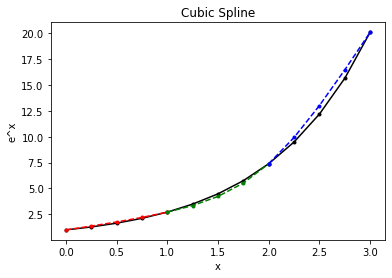

In [ ]:
def cubic_spline(x, y):
  """
  Parameters
  ----------
  x  : list of floats
  y  : list of floats

  Returns
  -------
  list of list of floats
  """
  n = len(x) - 1
  h = [x[i+1]-x[i] for i in range(n)]
  al = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1,n)]
  al.insert(0,0)

  l = [1] * (n+1)
  u = [0] * (n+1)
  z = [0] * (n+1)
  for i in range(1, n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*u[i-1]
    u[i] = h[i]/l[i]
    z[i] = (al[i] - h[i-1]*z[i-1])/l[i]

  b = [0] * (n+1)
  c = [0] * (n+1)
  d = [0] * (n+1)
  for i in range(n-1, -1, -1):    #for i in reversed(range(n)):
    c[i] = z[i] - u[i]*c[i+1]
    b[i] = (y[i+1]-y[i])/h[i] - h[i]*(c[i+1] + 2*c[i])/3
    d[i] = (c[i+1]-c[i])/(3*h[i])
  return [y, b, c, d]

if __name__ == '__main__':
  import math
  import matplotlib.pyplot as plt
  import numpy as np

  # the function to be interpolated
  def f(x):
    return math.e ** x

  # input
  interval = 3
  x = [i for i in range(interval + 1)]
  y = [f(i) for i in range(interval + 1)]

  # process
  a = cubic_spline(x, y)

  # prepare data for plotting the splines
  points_per_interval = 5
  xs = []
  ys = []
  for i in range(3):
    xs.append(np.linspace(i, i+1, points_per_interval))
    ys.append([a[0][i] +
               a[1][i]*(xs[i][k]-i) +
               a[2][i]*(xs[i][k]-i)**2 +
               a[3][i]*(xs[i][k]-i)**3
               for k in range(points_per_interval)])

  # prepare data for plotting the given function
  x = np.linspace(0, 3, interval * points_per_interval - (interval - 1))
  y = [f(x[i]) for i in range(len(x))]

  plt.plot(x, y, 'k.-', xs[0], ys[0], 'r.--', xs[1], ys[1], 'g.--', xs[2], ys[2], 'b.--')

  plt.title('Cubic Spline')
  plt.xlabel('x')
  plt.ylabel('e^x')
  plt.show()

# cubic spline interpolation
# author : worasait suwannik
# date   : apr 2015

